In [1]:
#from tensorflow.keras.applications import VGG16
import tensorflow as tf
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = tf.keras.applications.VGG16(weights="imagenet")

553467096/553467096 [==============================] - 25s 0us/step


In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
def show_image(image_path):
  image = mpimg.imread(image_path)
  print(image.shape)
  plt.imshow(image)

(183, 276, 3)


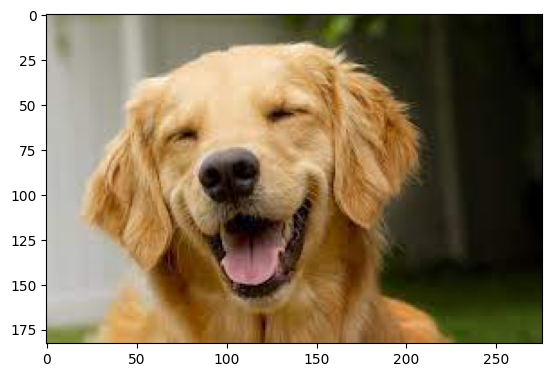

In [5]:
show_image("drive/MyDrive/00AI/happy_dog.jpg")

In [11]:
#from tensorflow.keras.preprocessing import image as image_utils
#from tensorflow.keras.applications.vgg16 import preprocess_input
image_utils=tf.keras.preprocessing.image
preprocess_input=tf.keras.applications.vgg16.preprocess_input

In [12]:
def load_and_process_image(image_path):
	# Print image's original shape, for reference
	print('Original image shape: ', mpimg.imread(image_path).shape)

	# Load in the image with a target size of 224, 224
	image = image_utils.load_img(image_path, target_size=(224, 224))
	# Convert the image from a PIL format to a numpy array
	image = image_utils.img_to_array(image)
	# Add a dimension for number of images, in our case 1
	image = image.reshape(1,224,224,3)
	# Preprocess image to align with original ImageNet dataset
	image = preprocess_input(image)
	# Print image's shape after processing
	print('Processed image shape: ', image.shape)
	return image

In [13]:
processed_image = load_and_process_image("drive/MyDrive/00AI/brown_bear.jpg")

Original image shape:  (528, 670, 3)
Processed image shape:  (1, 224, 224, 3)


In [14]:
#from tensorflow.keras.applications.vgg16 import decode_predictions
decode_predictions=tf.keras.applications.vgg16.decode_predictions
def readable_prediction(image_path):
	# Show image
	show_image(image_path)
	# Load and pre-process image
	image = load_and_process_image(image_path)
	# Make predictions
	predictions = model.predict(image)
	# Print predictions in readable form
	print('Predicted:', decode_predictions(predictions, top=3))

(183, 276, 3)
Original image shape:  (183, 276, 3)
Processed image shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 0us/step
Predicted: [[('n02099601', 'golden_retriever', 0.9813509), ('n02090379', 'redbone', 0.0034076194), ('n04409515', 'tennis_ball', 0.003238402)]]


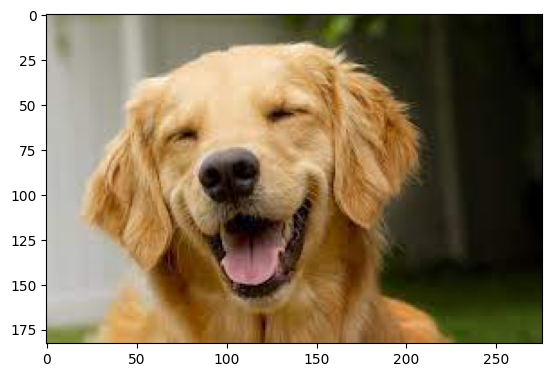

In [15]:
readable_prediction("drive/MyDrive/00AI/happy_dog.jpg")

(528, 670, 3)
Original image shape:  (528, 670, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
Predicted: [[('n02132136', 'brown_bear', 0.9997453), ('n02133161', 'American_black_bear', 0.00024717656), ('n02134418', 'sloth_bear', 5.343578e-06)]]


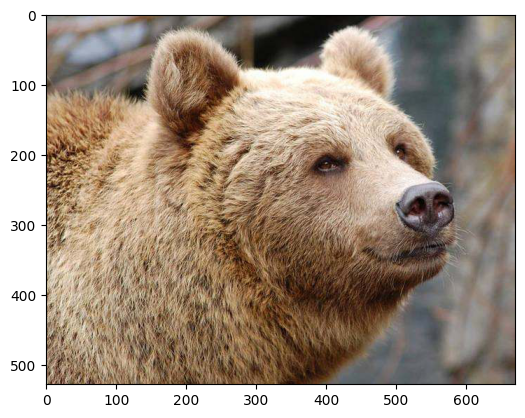

In [16]:
readable_prediction("drive/MyDrive/00AI/brown_bear.jpg")

(506, 800, 3)
Original image shape:  (506, 800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
Predicted: [[('n02123159', 'tiger_cat', 0.31884325), ('n02123045', 'tabby', 0.14793605), ('n02124075', 'Egyptian_cat', 0.06982102)]]


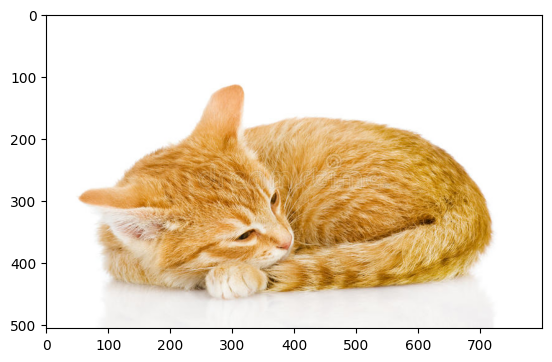

In [17]:
readable_prediction("drive/MyDrive/00AI/sleep_cat.jpg")

(225, 225, 3)
Original image shape:  (225, 225, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 38ms/step
Predicted: [[('n03724870', 'mask', 0.73183495), ('n03935335', 'piggy_bank', 0.0541609), ('n03047690', 'clog', 0.029995527)]]


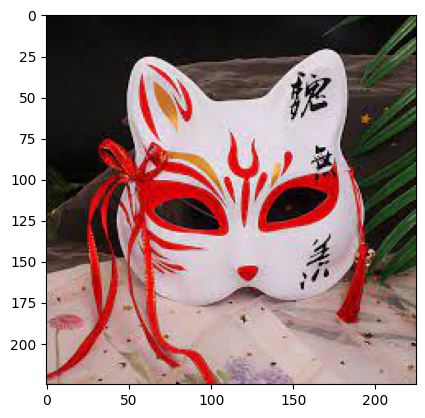

In [18]:
readable_prediction("drive/MyDrive/00AI/mask.jpg")

In [19]:
import numpy as np
def doggy_door(image_path):
	show_image(image_path)
	image = load_and_process_image(image_path)
	preds = model.predict(image)
	if 151 <= np.argmax(preds) <= 268:
		print("Doggy come on in!")
	elif 281 <= np.argmax(preds) <= 285:
		print("Kitty stay inside!")
	else:
		print("You're not a dog! Stay outside!")

(528, 670, 3)
Original image shape:  (528, 670, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 44ms/step
You're not a dog! Stay outside!


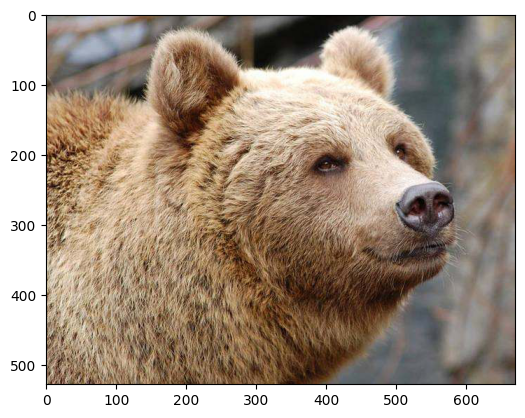

In [20]:
doggy_door('drive/MyDrive/00AI/brown_bear.jpg')

(183, 276, 3)
Original image shape:  (183, 276, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 23ms/step
Doggy come on in!


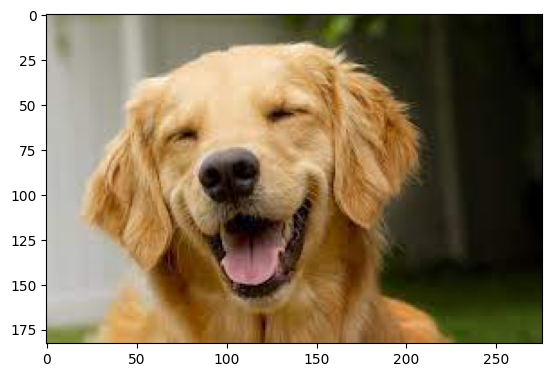

In [21]:
doggy_door('drive/MyDrive/00AI/happy_dog.jpg')

(506, 800, 3)
Original image shape:  (506, 800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
Kitty stay inside!


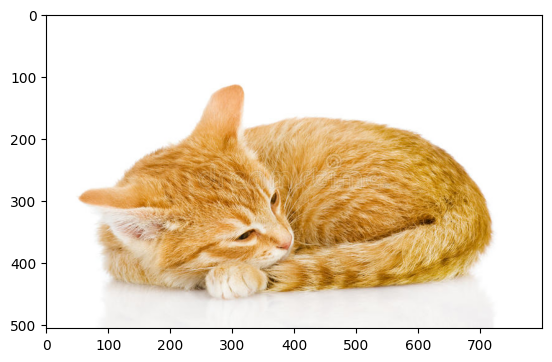

In [22]:
doggy_door('drive/MyDrive/00AI/sleep_cat.jpg')